<a href="https://colab.research.google.com/github/Mahanta02/CapstoneProject/blob/Sentral/Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/vtjd68bmwt-1.zip

--2023-11-27 12:48:24--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/vtjd68bmwt-1.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 52.92.36.186, 3.5.71.60, 3.5.66.119, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|52.92.36.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110332093 (105M) [application/zip]
Saving to: ‘vtjd68bmwt-1.zip’

vtjd68bmwt-1.zip    100%[===================>] 105.22M  64.6MB/s    in 1.6s    

2023-11-27 12:48:26 (64.6 MB/s) - ‘vtjd68bmwt-1.zip’ saved [110332093/110332093]



In [2]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
local_zip = './vtjd68bmwt-1.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

base_dir = 'Indonesian Food Image'
subfolder = 'Clean_Data'
Cleansub1 = 'train'
Cleansub2 = 'test'
train_dir1 = os.path.join(base_dir,subfolder,Cleansub1)
bakso_train_dir = os.path.join(train_dir1, 'bakso')
gudeg_train_dir = os.path.join(train_dir1, 'gudeg')
bebek_train_dir = os.path.join(train_dir1, 'bebek_betutu')
rawon_train_dir = os.path.join(train_dir1, 'rawon')
gado_train_dir = os.path.join(train_dir1, 'gado_gado')
nasi_train_dir = os.path.join(train_dir1, 'nasi_goreng')
pempek_train_dir = os.path.join(train_dir1, 'pempek')
rendang_train_dir = os.path.join(train_dir1, 'rendang')
sate_train_dir = os.path.join(train_dir1, 'sate')
soto_train_dir = os.path.join(train_dir1, 'soto')

test_dir2 = os.path.join(base_dir,subfolder,Cleansub2)
bakso_test_dir = os.path.join(test_dir2, 'bakso')
gudeg_test_dir = os.path.join(test_dir2, 'gudeg')
bebek_test_dir = os.path.join(test_dir2, 'bebek_betutu')
rawon_test_dir = os.path.join(test_dir2, 'rawon')
gado_test_dir = os.path.join(test_dir2, 'gado_gado')
nasi_test_dir = os.path.join(test_dir2, 'nasi_goreng')
pempek_test_dir = os.path.join(test_dir2, 'pempek')
rendang_test_dir = os.path.join(test_dir2, 'rendang')
sate_test_dir = os.path.join(test_dir2, 'sate')
soto_test_dir = os.path.join(test_dir2, 'soto')

In [28]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer= RMSprop(learning_rate=1e-4),
                loss= 'binary_crossentropy',
                metrics= ['accuracy'])

  return model

In [29]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir1,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir2,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2866 images belonging to 10 classes.
Found 1193 images belonging to 10 classes.


In [32]:
EPOCHS = 5

model = create_model()

history = model.fit(
                    train_generator,
                    steps_per_epoch = 100,
                    epochs = EPOCHS,
                    validation_data = validation_generator,
                    validation_steps = 50,
                    verbose = 2
                    )

Epoch 1/5
100/100 - 133s - loss: -1.6639e+05 - accuracy: 0.0791 - val_loss: -8.5235e+05 - val_accuracy: 0.0810 - 133s/epoch - 1s/step
Epoch 2/5
100/100 - 127s - loss: -5.8813e+06 - accuracy: 0.0811 - val_loss: -1.5470e+07 - val_accuracy: 0.0790 - 127s/epoch - 1s/step
Epoch 3/5
100/100 - 121s - loss: -4.6412e+07 - accuracy: 0.0836 - val_loss: -9.8239e+07 - val_accuracy: 0.0820 - 121s/epoch - 1s/step
Epoch 4/5
100/100 - 124s - loss: -2.1535e+08 - accuracy: 0.0821 - val_loss: -3.7340e+08 - val_accuracy: 0.0790 - 124s/epoch - 1s/step
Epoch 5/5
100/100 - 121s - loss: -6.9311e+08 - accuracy: 0.0836 - val_loss: -1.1040e+09 - val_accuracy: 0.0750 - 121s/epoch - 1s/step


In [33]:
def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

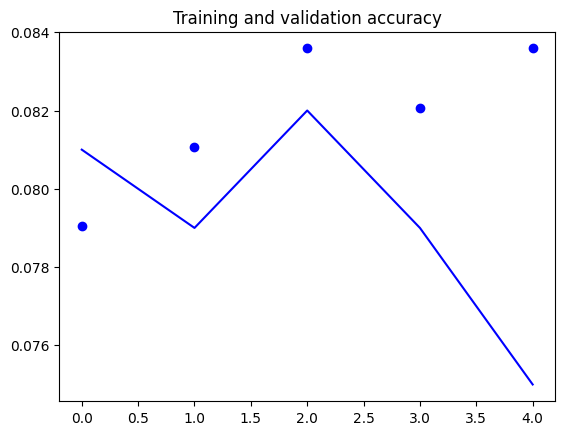

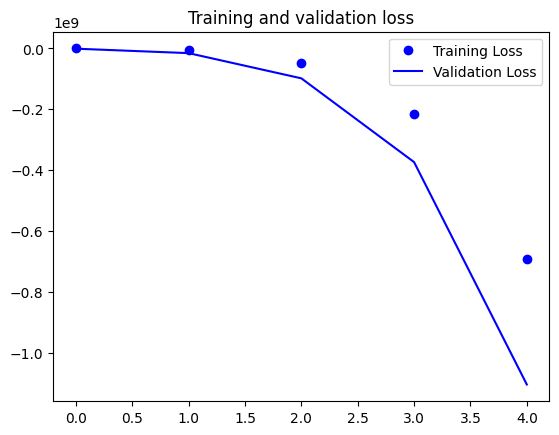

In [34]:
plot_loss_acc(history)

In [35]:
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir1,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        test_dir2,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
history_with_aug = model_for_aug.fit(
                                     train_generator,
                                     steps_per_epoch=100,  # 2000 images = batch_size * steps
                                     epochs=EPOCHS,
                                     validation_data=validation_generator,
                                     validation_steps=50,  # 1000 images = batch_size * steps
                                     verbose=2)


Found 2866 images belonging to 10 classes.
Found 1193 images belonging to 10 classes.
Epoch 1/5
100/100 - 140s - loss: -1.4652e+05 - accuracy: 0.0806 - val_loss: -7.4796e+05 - val_accuracy: 0.0850 - 140s/epoch - 1s/step
Epoch 2/5
100/100 - 131s - loss: -5.4787e+06 - accuracy: 0.0791 - val_loss: -1.5372e+07 - val_accuracy: 0.0820 - 131s/epoch - 1s/step
Epoch 3/5
100/100 - 131s - loss: -4.6540e+07 - accuracy: 0.0820 - val_loss: -9.9127e+07 - val_accuracy: 0.0830 - 131s/epoch - 1s/step
Epoch 4/5
100/100 - 129s - loss: -2.2087e+08 - accuracy: 0.0831 - val_loss: -3.9624e+08 - val_accuracy: 0.0820 - 129s/epoch - 1s/step
Epoch 5/5
100/100 - 130s - loss: -7.1401e+08 - accuracy: 0.0886 - val_loss: -1.2047e+09 - val_accuracy: 0.0840 - 130s/epoch - 1s/step


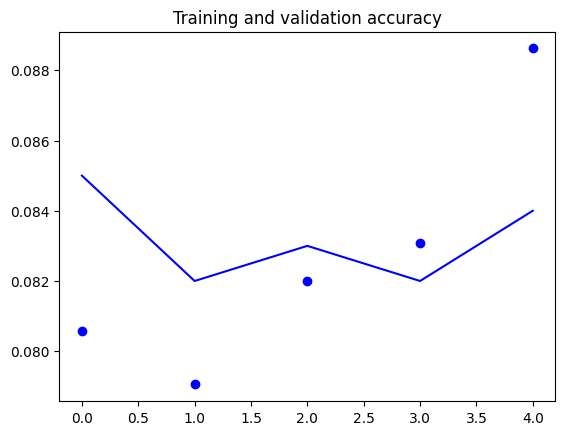

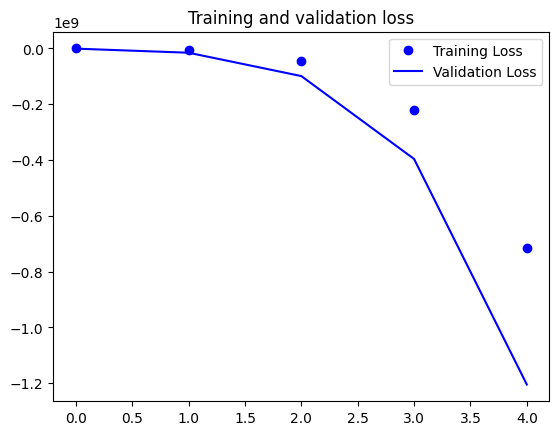

In [36]:
plot_loss_acc(history_with_aug)